In [9]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


In [10]:
def tambor_modo(n, k, distance, angle, t):
    kth_zero = sp.jn_zeros(n, k)[-1]
    return np.sin(t)*np.cos(n*angle)*sp.jn(n, distance*kth_zero)

In [25]:
nn = 100j
theta = np.r_[0:2*np.pi:nn]
radius = np.r_[0:1:nn]
tt = np.r_[0:2:nn]
th,rad = np.meshgrid(theta,radius)
y = rad*np.sin(th)
x = rad*np.cos(th)
z = 0.75*tambor_modo(0,2,rad, th, 1) - 0.5*tambor_modo(2,1,rad, th, 1)+ 0.5*tambor_modo(1,1,rad, th, 1)

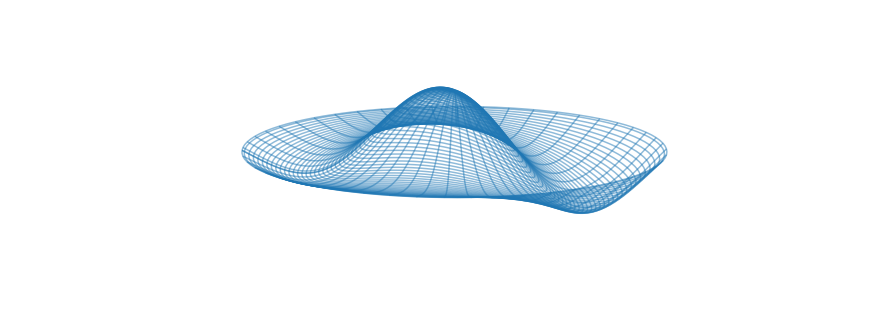

In [26]:
fig = plt.figure(figsize=(12,4))
ax = Axes3D(fig)
#ax.plot_surface(x, y, z)
#ax.plot_surface(x, y, z,rstride=2, cstride=2, alpha = 1 )
ax.plot_wireframe(x, y, z,rstride=2, cstride=2, alpha = 0.5 )
#ax.plot_trisurf(x, y, z, color = 'b', linewidth=0.3, antialiased=False)
#ax.plot_surface(x, y, z, color = 'gray', linewidth=0.3, antialiased=False)
ax.view_init(elev=40., azim=90)
ax.axis('off')
plt.show()

In [5]:
def data(i, z, line):
    t = 4*np.pi*i/100 
    z = 0.25*tambor_modo(0,2,rad, th, t) - 0.5*tambor_modo(2,1,rad, th, t)
    ax.clear()
    ax.set_zlim3d([-0.2, 1.5])
    line = ax.plot_wireframe(x, y, z,rstride=2, cstride=2, alpha = 0.5 )
    #line = ax.plot_surface(x, y, z, color = 'gray', linewidth=0.3, antialiased=False)
    #ax.plot_wireframe(x, y, z,rstride=1, cstride=1, alpha = 0.5 )
    ax.view_init(elev=40., azim=90)
    ax.axis('off')
    return line,


(0.0, 1.0, 0.0, 1.0)

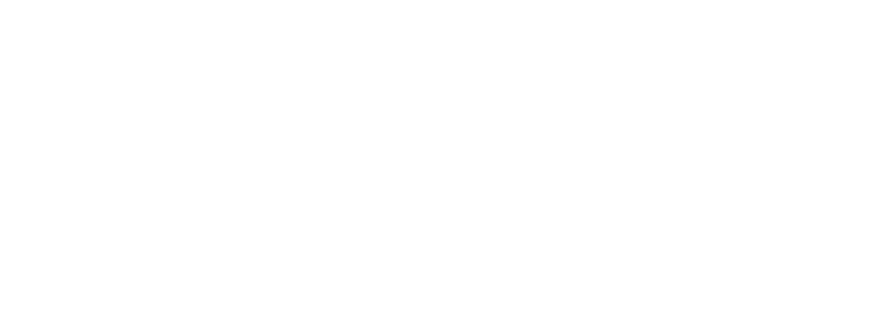

In [6]:
fig = plt.figure(figsize=(12,4))
ax = Axes3D(fig)
ax.set_zlim3d([-0.2, 1.5])
#ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40., azim=90)
ax.axis('off')

In [7]:

#z = tambor_modo(0,1,rad, th,tt) 
line = ax.plot_wireframe(x, y, z,rstride=1, cstride=1, alpha = 0.5 )

In [8]:
ani = animation.FuncAnimation(fig, data, fargs=(z, line), interval=100, blit=False)
ani.save('tamborSch.mp4', metadata={'artist':'Socarronte'})
plt.show()